In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import csv
from sklearn import cluster
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

/Users/geraintianpalmer/Documents/DetectingDeadlockInQingNetworkSimulation/venv/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
bound_data = []
file_name = 'data_for_graphs/ratio_bound_data.csv'
data_file = open(file_name, 'r')
rdr = csv.reader(data_file)
for row in rdr:
    bound_data.append([float(obs) for obs in row])

In [46]:
rhos = [max((row[0]/row[2])/(row[1]/row[3]),(row[1]/row[3])/(row[0]/row[2]))  for row in bound_data]

In [47]:
print len(rho1s)
print max(rho1s)
print min(rho1s)

7200000
50.0
1.0


In [80]:
rhos_boundaries = [0.0, 2.0, 4.0, 10.0, 25.0, 'Inf']
ratios_inverse_rhos = [[1.0/row[-1] for row in bound_data if max((row[0]/row[2])/(row[1]/row[3]),(row[1]/row[3])/(row[0]/row[2])) > rhos_boundaries[i] and max((row[0]/row[2])/(row[1]/row[3]),(row[1]/row[3])/(row[0]/row[2])) <= rhos_boundaries[i+1]] for i in range(5)]

In [81]:
ratios_inverse_rhos[0][:10]

[0.2856359649122807,
 0.29657965796579655,
 0.23295454545454544,
 0.2256028848320938,
 0.29657965796579655,
 0.23243656015037595,
 0.23243656015037595,
 0.2024647887323944,
 0.19099853742853343,
 0.20017537449762515]

In [82]:
[len(row) for row in ratios_inverse_rhos]

[3186000, 2156400, 1332000, 417600, 108000]

In [83]:
meansv = [sum(row)/len(row) for row in ratios_inverse_rhos]
means = [str(round(m, 4)) for m in meansv]

In [84]:
labs = [str(rhos_boundaries[i]) + ' < rho < ' + str(rhos_boundaries[i+1]) + ', mean = ' + means[i] for i in range(len(means))]

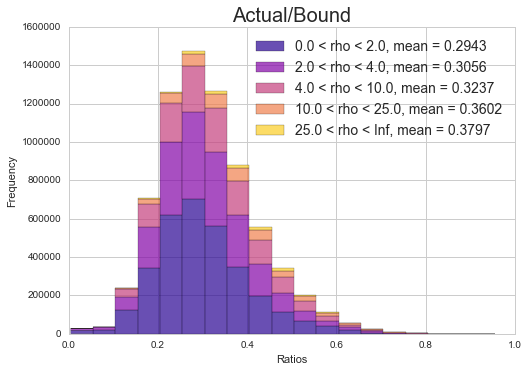

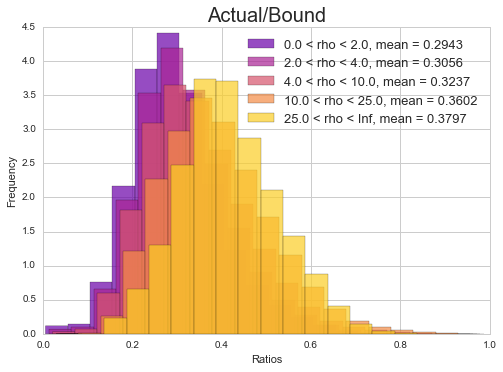

In [88]:
colormap = plt.cm.plasma
bins = [i/20.0 for i in range(20)]
width = 1.0/20.0


fig, ax = plt.subplots()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0.05, 0.9, len(ratios_inverse_rhos))])
plt.hist(ratios_inverse_rhos, bins=bins, width=width, alpha=0.7, stacked=True, label=labs)
plt.xlabel('Ratios')
plt.ylabel('Frequency')
plt.legend(fontsize=14)
ax.set_title('Actual/Bound', fontsize=20)
plt.show()

fig, ax = plt.subplots()
plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0.2, 0.9, len(ratios_inverse_rhos))])
plt.hist(ratios_inverse_rhos, bins=bins, width=width, alpha=0.7, stacked=False, label=labs, normed=True)
plt.xlabel('Ratios')
plt.ylabel('Frequency')
plt.legend(fontsize=13)
ax.set_title('Actual/Bound', fontsize=20)
plt.show()